In [222]:
data <- read.csv("data/data_cleaned.csv", header = TRUE, stringsAsFactors = TRUE)

In [223]:
head(data)

,What.is.the.preferred.programming.language.,What.are.the.preferred..Front.end.frameworks.and.libraries.,What.are.the.preferred..Back.end.frameworks.and.libraries.,What.is.the.preferred.IDE.and.code.editor.
,<fct>,<fct>,<fct>,<fct>
1,python,angular,spring,intellij
2,python,react,laravel,vscode
3,python,react,spring,vscode
4,python,react,laravel,vscode
5,python,angular,laravel,vscode
6,java,angular,node,intellij


In [224]:
summary(data)

 What.is.the.preferred.programming.language.
 java      :11                              
 javascript: 1                              
 python    :14                              
                                            
                                            
                                            
 What.are.the.preferred..Front.end.frameworks.and.libraries.
 angular  :11                                               
 react    :13                                               
 streamlit: 1                                               
 vue      : 1                                               
                                                            
                                                            
 What.are.the.preferred..Back.end.frameworks.and.libraries.
 django   : 1                                              
 laravel  : 5                                              
 nest     : 1                                              
 node     : 3     

In [225]:
colnames(data) <- c("lang", "front", "back", "ide")

In [226]:
library(ggplot2)
library(dplyr)

In [227]:
fav_langs <- data %>%
  group_by(lang) %>%
  summarise(count = n()) %>%
  arrange(desc(count))

In [228]:
sum(fav_langs$count)

[1] 26

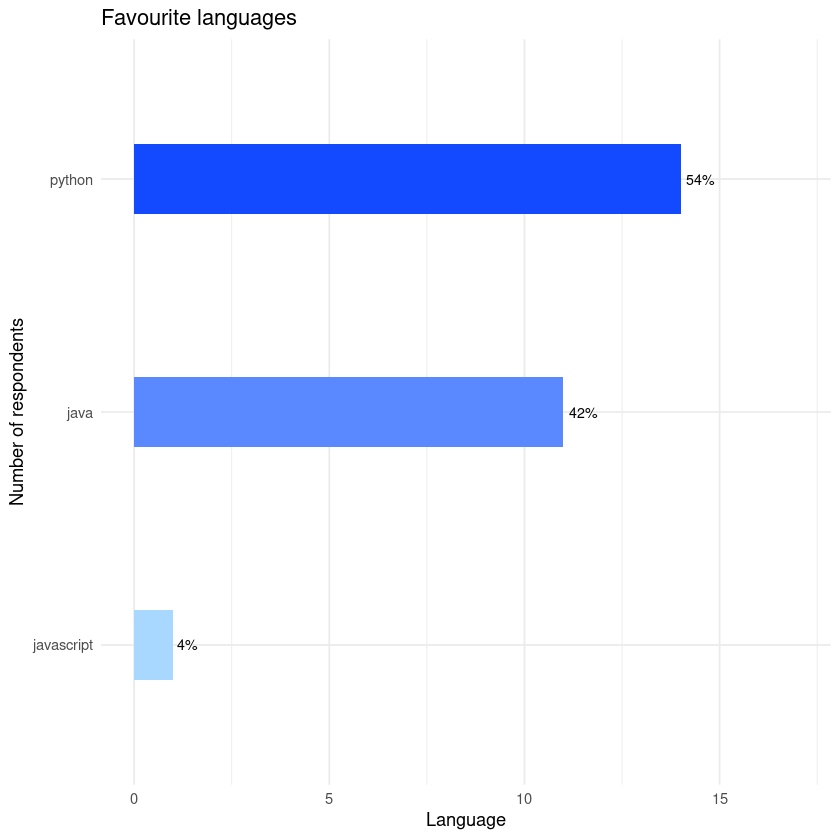

In [279]:
plot1 = ggplot(fav_langs, aes(y = reorder(lang, count), x = count, fill = lang)) +
  geom_col(show.legend = FALSE, width = 0.3) +
  coord_cartesian(xlim = c(0, 17)) +
  geom_text(aes(label = paste0(round((count / sum(count)) * 100), "%")), hjust = -0.2, size = 3, position = "stack") +
  labs(x = "Language", y = "Number of respondents", title = "Favourite languages") +
  scale_fill_manual(values = c("#5988ff", "#a8d7ff", "#134aff")) +
  theme_minimal() 
plot1

In [230]:
fav_front <- data %>%
  group_by(front) %>%
  summarise(count = n()) %>%
  arrange(desc(count))


fav_front

front,count
<fct>,<int>
react,13
angular,11
streamlit,1
vue,1


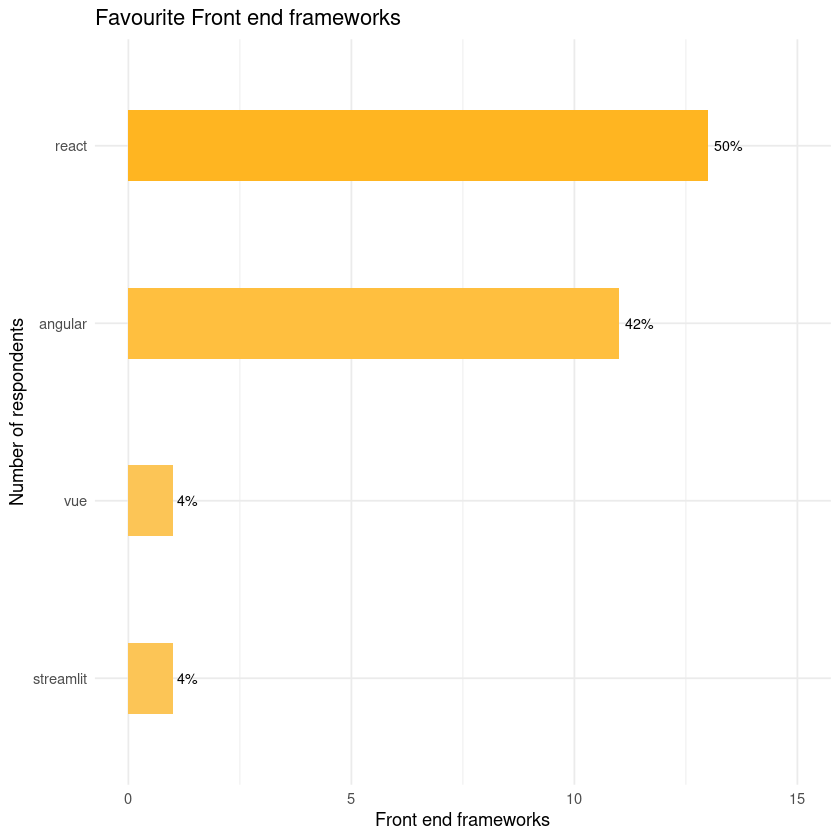

In [281]:
plot2 = ggplot(fav_front, aes(y = reorder(front, count), x = count, fill = front)) +
  geom_col(show.legend = FALSE, width = 0.4) +
  coord_cartesian(xlim = c(0, 15)) +
  geom_text(aes(label = paste0(round((count / sum(count)) * 100), "%")), hjust = -0.2, size = 3, position = "stack") +
  labs(x = "Front end frameworks", y = "Number of respondents", title = "Favourite Front end frameworks") +
  scale_fill_manual(values = c("#ffbf3f", "#ffb521", "#fcc556", "#fcc556")) + # Change the colors here
  theme_minimal()

plot2

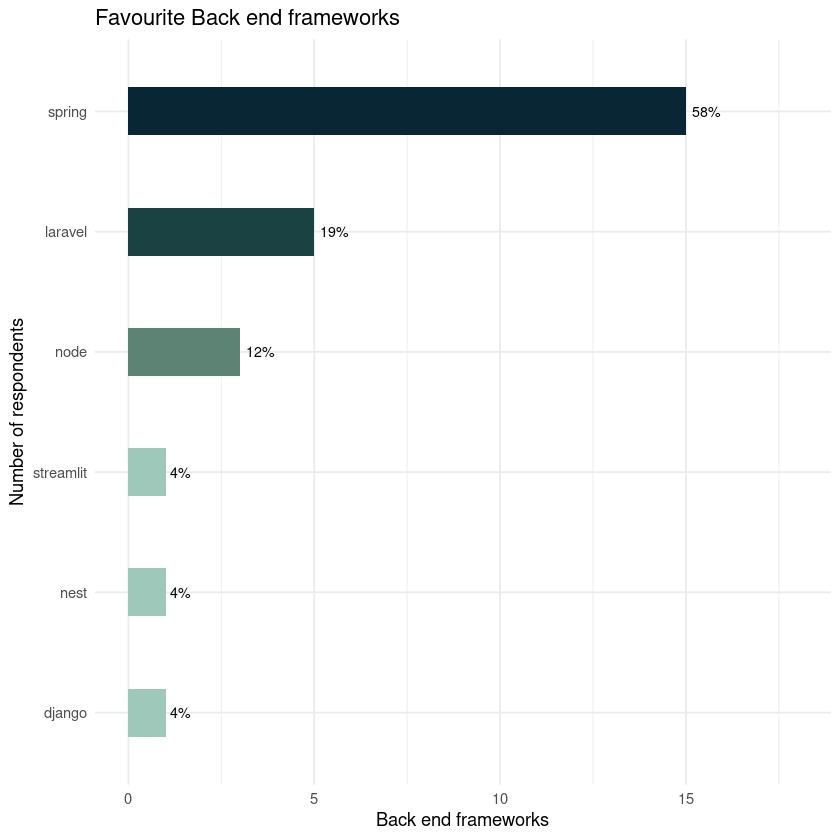

In [283]:
fav_back <- data %>%
  group_by(back) %>%
  summarise(count = n()) %>%
  arrange(desc(count))

# Define a color palette
# my_colors <- viridis::inferno(length(unique(fav_back$back)))
my_colors <- c("#9EC8B9", "#1B4242", "#9EC8B9", "#5C8374", "#092635", "#9EC8B9")

plot3 = ggplot(fav_back, aes(y = reorder(back, count), x = count, fill = back)) +
  geom_col(show.legend = FALSE, width = 0.4) +
  coord_cartesian(xlim = c(0, 18)) +
  geom_text(aes(label = paste0(round((count / sum(count)) * 100), "%")), hjust = -0.2, size = 3) +
  labs(x = "Back end frameworks", y = "Number of respondents", title = "Favourite Back end frameworks") +
  scale_fill_manual(values = my_colors) +
  theme_minimal()

plot3

In [284]:
fav_ide <- data %>%
  group_by(ide) %>%
  summarise(count = n()) %>%
  arrange(desc(count))

# Define a color palette
# my_colors <- viridis::inferno(length(unique(fav_ide$ide)))
my_colors <- c("#818FB4", "#435585", "#818FB4", "#363062", "#818FB4")

plot4 = ggplot(fav_ide, aes(y = reorder(ide, count), x = count, fill = ide)) +
  geom_col(show.legend = FALSE, width = 0.4) +
  coord_cartesian(xlim = c(0, 17)) +
  geom_text(aes(label = paste0(round((count / sum(count)) * 100), "%")), hjust = -0.2, size = 3) +
  labs(x = "IDE", y = "Number of respondents", title = "Favourite IDE") +
  scale_fill_manual(values = my_colors) +
  theme_minimal()


In [234]:
length((data$lang))

[1] 26

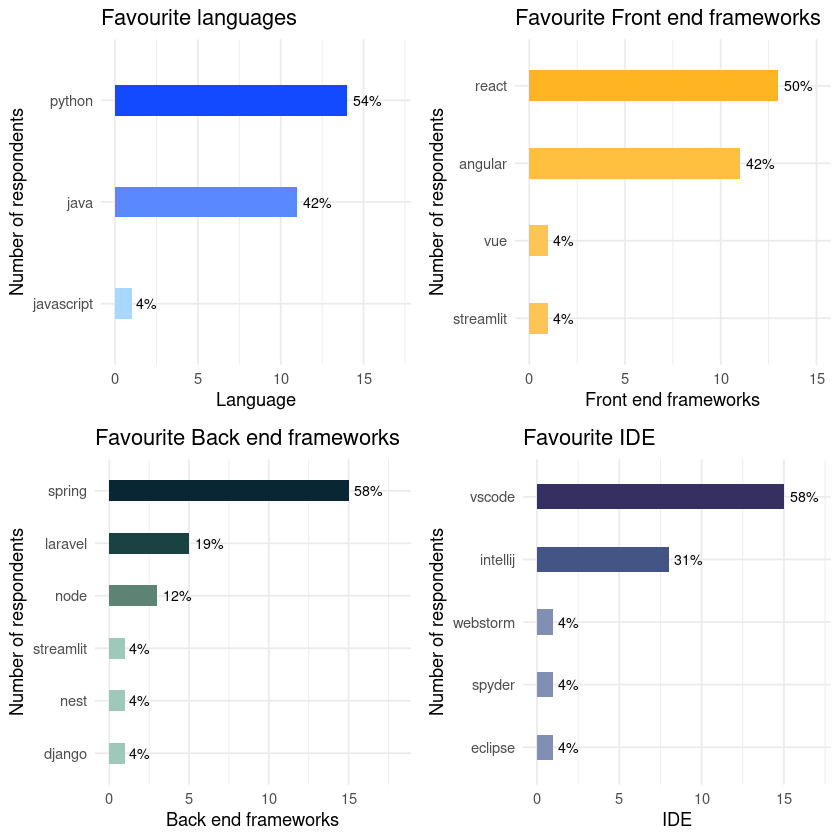

In [285]:
# Set up the plotting area
par(mfrow = c(2, 2))

# Load the gridExtra package
library(gridExtra)

# Group the plots into one figure with adjusted size
grid.arrange(
  plot1, plot2, plot3, plot4,
  ncol = 2, padding = 0.9,
  widths = c(4, 4), heights = c(4, 4)
)


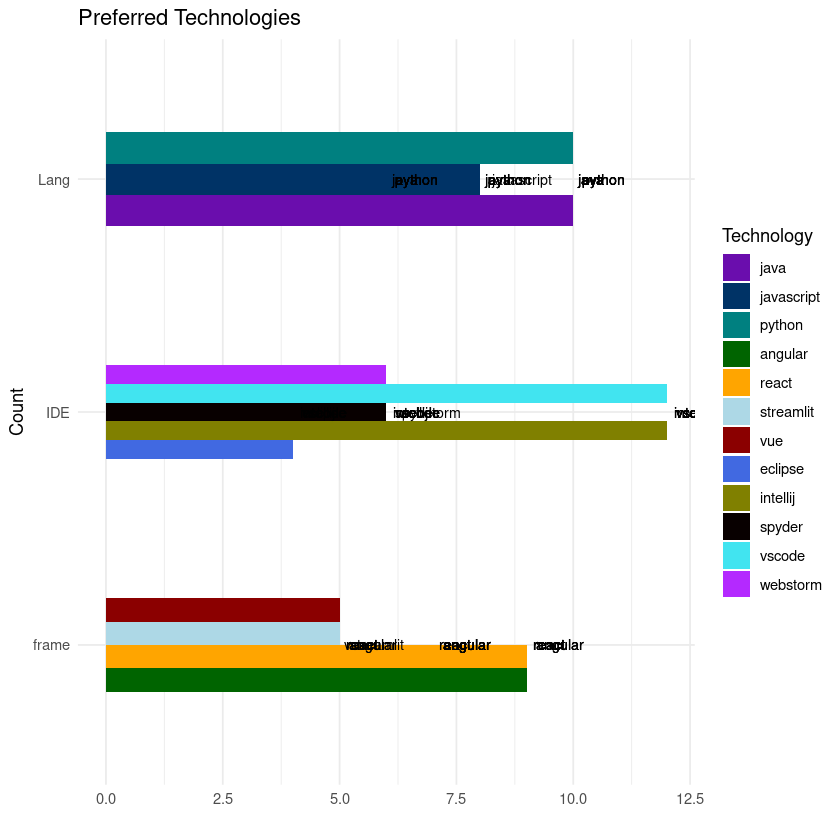

In [236]:
# Required packages
library(ggplot2)

# Data for the plot
lang <- data$lang
frame <- data$front
ide <- data$ide
counts_lang <- c(10, 8, 6)
counts_backend_frontend <- c(7, 9, 5)
counts_ide <- c(12, 4, 6)

# Determine the length of the longest vector
max_length <- max(length(lang), length(frame), length(ide))

# Extend the vectors to match the length of the longest vector
lang <- rep(lang, length.out = max_length)
frame <- rep(frame, length.out = max_length)
ide <- rep(ide, length.out = max_length)
counts_lang <- rep(counts_lang, length.out = max_length)
counts_backend_frontend <- rep(counts_backend_frontend, length.out = max_length)
counts_ide <- rep(counts_ide, length.out = max_length)

# Create a data frame
df <- data.frame(
  Category = c(rep("Lang", max_length),
               rep("frame", max_length),
               rep("IDE", max_length)),
  Technology = c(lang, frame, ide),
  Count = c(counts_lang, counts_backend_frontend, counts_ide)
)

# Define color palettes
lang_colors <- c("#6A0DAD", "#003366", "#008080")
backend_frontend_colors <- c("#006400", "#FFA500", "#ADD8E6")
ide_colors <- c("#8B0000", "#4169E1", "#808000", "#080000","#41e4f0" , "#b429ff")

# Plotting
ggplot(df, aes(y = Category, x = Count, fill = Technology)) +
  geom_bar(stat = "identity", width = 0.4, position = "dodge") +
  geom_text(aes(label = Technology), hjust = -0.2, size = 3) +
  scale_fill_manual(values = c(lang_colors, backend_frontend_colors, ide_colors)) +
  labs(x = "", y = "Count", title = "Preferred Technologies") +
  theme_minimal()

In [237]:
data$lang

[1] python     python     python     python     python     java      
 [7] java       python     java       java       javascript java      
[13] java       java       python     java       java       python    
[19] java       java       python     python     python     python    
[25] python     python    
Levels: java javascript python